In [1]:
#https://radhajayaraman11.medium.com/feature-selection-using-genetic-algorithm-2f915d1349b0
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [2]:
# load dataset
df = pd.read_csv("C:/Users/H A R I H A R A N/Desktop/sem 8/Heart Disease/heart.csv")
x = df.drop('target',axis = 1)
y = df['target']
# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=135)

In [3]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=10))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(n_estimators=10,
                                                 random_state=10))

In [4]:
sel_.get_support()


array([ True, False,  True,  True,  True, False, False,  True, False,
        True, False,  True,  True])

In [5]:
selected_feat = X_train.columns[(sel_.get_support())]
selected_feat

Index(['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')

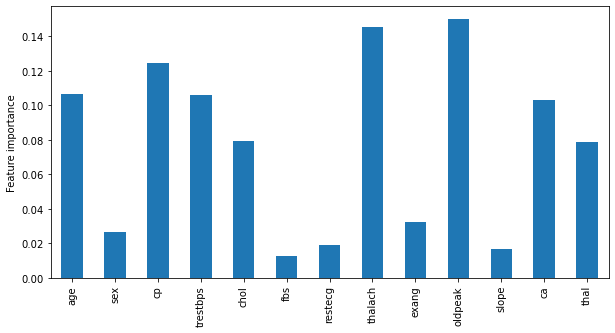

In [6]:
pd.Series(sel_.estimator_.feature_importances_.ravel(), index=X_train.columns).plot.bar(figsize=(10,5))
plt.ylabel('Feature importance')
plt.show()

In [15]:
new = df[['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'thal','target']]

In [16]:
x=new.drop('target',axis=1)    
y=new['target']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state = 135)

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier() 
model = rf_Model.fit(x_train,y_train)
print (model.score(x_test,y_test)*100)

83.60655737704919


In [16]:
from xgboost import XGBClassifier
sel_ = SelectFromModel(XGBClassifier())

sel_.fit(X_train, y_train)

SelectFromModel(estimator=XGBClassifier(base_score=None, booster=None,
                                        callbacks=None, colsample_bylevel=None,
                                        colsample_bynode=None,
                                        colsample_bytree=None,
                                        early_stopping_rounds=None,
                                        enable_categorical=False,
                                        eval_metric=None, feature_types=None,
                                        gamma=None, gpu_id=None,
                                        grow_policy=None, importance_type=None,
                                        interaction_constraints=None,
                                        learning_rate=None, max_bin=None,
                                        max_cat_threshold=None,
                                        max_cat_to_onehot=None,
                                        max_delta_step=None, max_depth=None,
                 

In [17]:
sel_.get_support()

array([False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True])

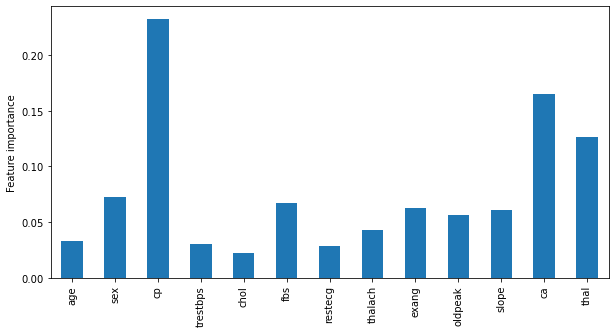

In [18]:
selected_feat = X_train.columns[(sel_.get_support())]
selected_feat
pd.Series(sel_.estimator_.feature_importances_.ravel(), index=X_train.columns).plot.bar(figsize=(10,5))
plt.ylabel('Feature importance')
plt.show()

In [19]:
selected_feat

Index(['cp', 'ca', 'thal'], dtype='object')

In [20]:
from xgboost import XGBClassifier
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.20, random_state = 135)
xgb_Model = XGBClassifier()
model = xgb_Model.fit(x_train,y_train)
model.score(x_test,y_test)*100

86.88524590163934

In [9]:
from sklearn.neighbors import KNeighborsClassifier

sel_ = SelectFromModel(KNeighborsClassifier(n_neighbors=9))

sel_.fit(X_train, y_train)

SelectFromModel(estimator=KNeighborsClassifier(n_neighbors=9))

In [10]:
sel_.get_support()

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [11]:
selected_feat = X_train.columns[(sel_.get_support())]
selected_feat
pd.Series(sel_.estimator_.feature_importances_.ravel(), index=X_train.columns).plot.bar(figsize=(10,5))
plt.ylabel('Feature importance')
plt.show()

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.